In [1]:
#import library
import os
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import cm
from sklearn.metrics import auc, roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#opening pickle file of augmented added data
with open('/content/drive/Shareddrives/SignLanguageData/combined_augmented_data_v3.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [4]:
# #opening pickle file of augmented added data
# with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
#     X_train,y_train,X_test,y_test = pickle.load(f)

In [5]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [6]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [7]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(np.unique(y_train.astype(int))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [ ]:
# Reshape the data to (num_samples, 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train
y_test = y_test
# Print the shapes of the augmented data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (109820, 784)
y_train shape: (109820,)
X_test shape: (28688, 784)
y_test shape: (28688,)


### Function for model evalution


In [11]:
def evaluate_model(y_true, y_pred, labels):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Classification report
    print("Classification report:")
    print(classification_report(y_true, y_pred, target_names=labels))
    
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f"MCC: {mcc}")
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)
    print(f"Cohen's Kappa: {kappa}")
    
    # Confusion Matrix
    cm = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=labels)
    fig, ax = plt.subplots(figsize=(16,14))  # set figure size
    cm.plot(cmap='BuPu', ax=ax)  # set color map and axis
    plt.title("Confusion Matrix")
    plt.show()


In [12]:
def plot_roc_curve(classifiers, X_train, y_train):
    n_classes = len(np.unique(y_train))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_train == i, classifiers.predict_proba(X_train)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    colors = cm.tab20(np.linspace(0, 1, n_classes))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
#standardized data 
#using sklearn standard scaler model and fitting on training data 
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
#normalized data 
X_train_norm = X_train/255 
X_test_norm = X_test/255

#### Applying naive bayes 

In [ ]:
gnb = GaussianNB()

In [ ]:
# applying NB on normalized train data
y_pred_nm = gnb.fit(X_train_norm, y_train).predict(X_train_norm)

print(f"Accuracy: {accuracy_score(y_train, y_pred_nm)}")
print("Classification report:")
print(classification_report(y_train, y_pred_nm, target_names=letters))

Accuracy: 0.21761063558550356
Classification report:
              precision    recall  f1-score   support

           A       0.45      0.19      0.27      4504
           B       0.46      0.19      0.27      4040
           C       0.63      0.43      0.51      4576
           D       0.37      0.08      0.14      4784
           E       0.27      0.34      0.30      3828
           F       0.30      0.13      0.18      4816
           G       0.47      0.29      0.36      4360
           H       0.67      0.13      0.22      4052
           I       0.18      0.38      0.24      4648
           K       0.25      0.30      0.27      4456
           L       0.38      0.25      0.30      4964
           M       0.34      0.07      0.12      4220
           N       0.43      0.04      0.08      4604
           O       0.39      0.26      0.31      4784
           P       0.10      0.65      0.17      4352
           Q       0.40      0.28      0.33      5116
           R       0.18     

In [ ]:
# applying NB on normalized test data
y_pred_nm = gnb.fit(X_train_norm, y_train).predict(X_test_norm)

print(f"Accuracy: {accuracy_score(y_test, y_pred_nm)}")
print("Classification report:")
print(classification_report(y_test, y_pred_nm, target_names=letters))

Accuracy: 0.19739960959286112
Classification report:
              precision    recall  f1-score   support

           A       0.44      0.17      0.24      1324
           B       0.58      0.15      0.24      1728
           C       0.55      0.31      0.40      1240
           D       0.35      0.09      0.15       980
           E       0.38      0.30      0.34      1992
           F       0.29      0.14      0.19       988
           G       0.43      0.30      0.35      1392
           H       0.79      0.12      0.21      1744
           I       0.11      0.28      0.16      1152
           K       0.25      0.27      0.26      1324
           L       0.30      0.21      0.25       836
           M       0.30      0.05      0.09      1576
           N       0.28      0.04      0.07      1164
           O       0.28      0.21      0.24       984
           P       0.13      0.71      0.22      1388
           Q       0.21      0.25      0.22       656
           R       0.09     

In [ ]:
# applying NB on standerdized data
y_pred_sc = gnb.fit(X_train_sc, y_train).predict(X_train_sc)

print(f"Accuracy: {accuracy_score(y_train, y_pred_sc)}")
print("Classification report:")
print(classification_report(y_train, y_pred_sc, target_names=letters))

Accuracy: 0.21761063558550356
Classification report:
              precision    recall  f1-score   support

           A       0.45      0.19      0.27      4504
           B       0.46      0.19      0.27      4040
           C       0.63      0.43      0.51      4576
           D       0.37      0.08      0.14      4784
           E       0.27      0.34      0.30      3828
           F       0.30      0.13      0.18      4816
           G       0.47      0.29      0.36      4360
           H       0.67      0.13      0.22      4052
           I       0.18      0.38      0.24      4648
           K       0.25      0.30      0.27      4456
           L       0.38      0.25      0.30      4964
           M       0.34      0.07      0.12      4220
           N       0.43      0.04      0.08      4604
           O       0.39      0.26      0.31      4784
           P       0.10      0.65      0.17      4352
           Q       0.40      0.28      0.33      5116
           R       0.18     

In [ ]:
# applying NB on standerdized data
y_pred_sc = gnb.fit(X_train_sc, y_train).predict(X_test_sc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_sc)}")
print("Classification report:")
print(classification_report(y_test, y_pred_sc, target_names=letters))

Accuracy: 0.19739960959286112
Classification report:
              precision    recall  f1-score   support

           A       0.44      0.17      0.24      1324
           B       0.58      0.15      0.24      1728
           C       0.55      0.31      0.40      1240
           D       0.35      0.09      0.15       980
           E       0.38      0.30      0.34      1992
           F       0.29      0.14      0.19       988
           G       0.43      0.30      0.35      1392
           H       0.79      0.12      0.21      1744
           I       0.11      0.28      0.16      1152
           K       0.25      0.27      0.26      1324
           L       0.30      0.21      0.25       836
           M       0.30      0.05      0.09      1576
           N       0.28      0.04      0.07      1164
           O       0.28      0.21      0.24       984
           P       0.13      0.71      0.22      1388
           Q       0.21      0.25      0.22       656
           R       0.09     

### Logistic regrassion

In [ ]:
lr = LogisticRegression(max_iter=5000)

In [ ]:
# testing logistic regression on train data
y_pred_lr = lr.fit(X_train_sc, y_train).predict(X_train_sc)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr, target_names=letters))


Accuracy: 0.6823711527954835
Classification report:
              precision    recall  f1-score   support

           A       0.71      0.75      0.73      4504
           B       0.77      0.78      0.77      4040
           C       0.87      0.87      0.87      4576
           D       0.64      0.60      0.62      4784
           E       0.74      0.70      0.72      3828
           F       0.69      0.67      0.68      4816
           G       0.77      0.76      0.76      4360
           H       0.72      0.68      0.70      4052
           I       0.66      0.70      0.68      4648
           K       0.68      0.71      0.69      4456
           L       0.67      0.74      0.70      4964
           M       0.64      0.58      0.61      4220
           N       0.64      0.61      0.63      4604
           O       0.78      0.77      0.77      4784
           P       0.75      0.79      0.77      4352
           Q       0.77      0.79      0.78      5116
           R       0.57      

In [ ]:
# testing logistic regression on test data
y_pred_lr_sc = lr.fit(X_train_sc, y_train).predict(X_test_sc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_sc)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_sc, target_names=letters))


Accuracy: 0.5139431121026213
Classification report:
              precision    recall  f1-score   support

           A       0.56      0.64      0.60      1324
           B       0.75      0.65      0.70      1728
           C       0.75      0.71      0.73      1240
           D       0.43      0.53      0.48       980
           E       0.73      0.57      0.64      1992
           F       0.48      0.52      0.50       988
           G       0.62      0.57      0.59      1392
           H       0.78      0.57      0.66      1744
           I       0.42      0.45      0.43      1152
           K       0.55      0.52      0.53      1324
           L       0.50      0.74      0.60       836
           M       0.50      0.40      0.45      1576
           N       0.36      0.38      0.37      1164
           O       0.57      0.54      0.55       984
           P       0.77      0.72      0.75      1388
           Q       0.48      0.70      0.57       656
           R       0.10      

In [ ]:
#normalized data 
X_train_norm = X_train/255 
X_test_norm = X_test/255

In [ ]:
# applying logistic regression on normalized data
y_pred_lr_nm = lr.fit(X_train_norm, y_train).predict(X_test_norm)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_nm)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_nm, target_names=letters))


Accuracy: 0.5329754601226994
Classification report:
              precision    recall  f1-score   support

           A       0.57      0.65      0.61      1324
           B       0.77      0.66      0.71      1728
           C       0.75      0.71      0.73      1240
           D       0.47      0.55      0.50       980
           E       0.74      0.58      0.65      1992
           F       0.49      0.56      0.52       988
           G       0.63      0.58      0.61      1392
           H       0.81      0.58      0.68      1744
           I       0.44      0.47      0.45      1152
           K       0.54      0.49      0.51      1324
           L       0.51      0.78      0.62       836
           M       0.55      0.44      0.49      1576
           N       0.37      0.39      0.38      1164
           O       0.60      0.55      0.57       984
           P       0.80      0.78      0.79      1388
           Q       0.50      0.69      0.58       656
           R       0.11      

In [ ]:
# applying logistic regression on normalized data
y_pred_lr_nm = lr.fit(X_train_norm, y_train).predict(X_train_norm)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr_nm)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr_nm, target_names=letters))


Accuracy: 0.6718175195774905
Classification report:
              precision    recall  f1-score   support

           A       0.70      0.75      0.73      4504
           B       0.76      0.77      0.77      4040
           C       0.87      0.86      0.86      4576
           D       0.63      0.58      0.61      4784
           E       0.73      0.69      0.71      3828
           F       0.68      0.66      0.67      4816
           G       0.76      0.75      0.75      4360
           H       0.71      0.67      0.69      4052
           I       0.64      0.69      0.66      4648
           K       0.67      0.69      0.68      4456
           L       0.65      0.73      0.69      4964
           M       0.64      0.57      0.60      4220
           N       0.64      0.60      0.62      4604
           O       0.77      0.76      0.76      4784
           P       0.74      0.78      0.76      4352
           Q       0.76      0.77      0.77      5116
           R       0.56      

### LDA on SC data

In [ ]:
#define sklearn LDA object 
lda = LinearDiscriminantAnalysis()
#fit on training data 
lda.fit(X_train_sc,y_train)

LinearDiscriminantAnalysis()

In [ ]:
#fit on training data and transform
X_train_lda = lda.transform(X_train_sc)
X_test_lda = lda.transform(X_test_sc)

In [ ]:
# testing logistic regression on train lda data
y_pred_lr = lr.fit(X_train_lda, y_train).predict(X_train_lda)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr, target_names=letters))


Accuracy: 0.5857038790748498
Classification report:
              precision    recall  f1-score   support

           A       0.62      0.60      0.61      4504
           B       0.65      0.65      0.65      4040
           C       0.81      0.75      0.78      4576
           D       0.52      0.50      0.51      4784
           E       0.66      0.60      0.62      3828
           F       0.57      0.60      0.58      4816
           G       0.67      0.63      0.65      4360
           H       0.64      0.60      0.62      4052
           I       0.53      0.60      0.57      4648
           K       0.58      0.59      0.58      4456
           L       0.59      0.67      0.63      4964
           M       0.55      0.49      0.52      4220
           N       0.52      0.49      0.51      4604
           O       0.71      0.70      0.70      4784
           P       0.69      0.69      0.69      4352
           Q       0.69      0.73      0.71      5116
           R       0.45      

In [ ]:
# testing logistic regression on test data
y_pred_lr_test = lr.fit(X_train_lda, y_train).predict(X_test_lda)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_test)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_test, target_names=letters))


Accuracy: 0.4447852760736196
Classification report:
              precision    recall  f1-score   support

           A       0.48      0.55      0.51      1324
           B       0.68      0.51      0.58      1728
           C       0.77      0.64      0.70      1240
           D       0.39      0.46      0.42       980
           E       0.64      0.48      0.55      1992
           F       0.41      0.48      0.44       988
           G       0.53      0.47      0.50      1392
           H       0.73      0.48      0.58      1744
           I       0.35      0.38      0.37      1152
           K       0.40      0.40      0.40      1324
           L       0.50      0.75      0.60       836
           M       0.44      0.32      0.37      1576
           N       0.27      0.30      0.28      1164
           O       0.55      0.52      0.53       984
           P       0.76      0.64      0.70      1388
           Q       0.37      0.62      0.47       656
           R       0.07      

### Using best parameters

now we will use our best parameters for logistic regression which include regularization on data.

Best hyperparameters: {'C': 3.4647045830997407, 'max_iter': 3171, 'penalty': 'l2', 'solver': 'liblinear', 'warm_start': False}

In [ ]:
lr = LogisticRegression(C=3.4647045830997407,
                        max_iter=3171, 
                        penalty="l2", 
                        solver="liblinear",
                        warm_start=False)

In [ ]:
# applying Logistic regression on standerdized data and predicting on train
y_pred_lr_train = lr.fit(X_train_lda, y_train).predict(X_train_lda)

Accuracy: 0.5771808413767984
Classification report:
              precision    recall  f1-score   support

           A       0.61      0.60      0.60      4504
           B       0.61      0.60      0.61      4040
           C       0.78      0.74      0.76      4576
           D       0.53      0.50      0.51      4784
           E       0.66      0.57      0.61      3828
           F       0.57      0.60      0.59      4816
           G       0.66      0.63      0.64      4360
           H       0.64      0.58      0.61      4052
           I       0.52      0.60      0.56      4648
           K       0.57      0.60      0.59      4456
           L       0.56      0.65      0.61      4964
           M       0.56      0.47      0.51      4220
           N       0.53      0.47      0.50      4604
           O       0.70      0.66      0.68      4784
           P       0.69      0.69      0.69      4352
           Q       0.68      0.75      0.71      5116
           R       0.45      

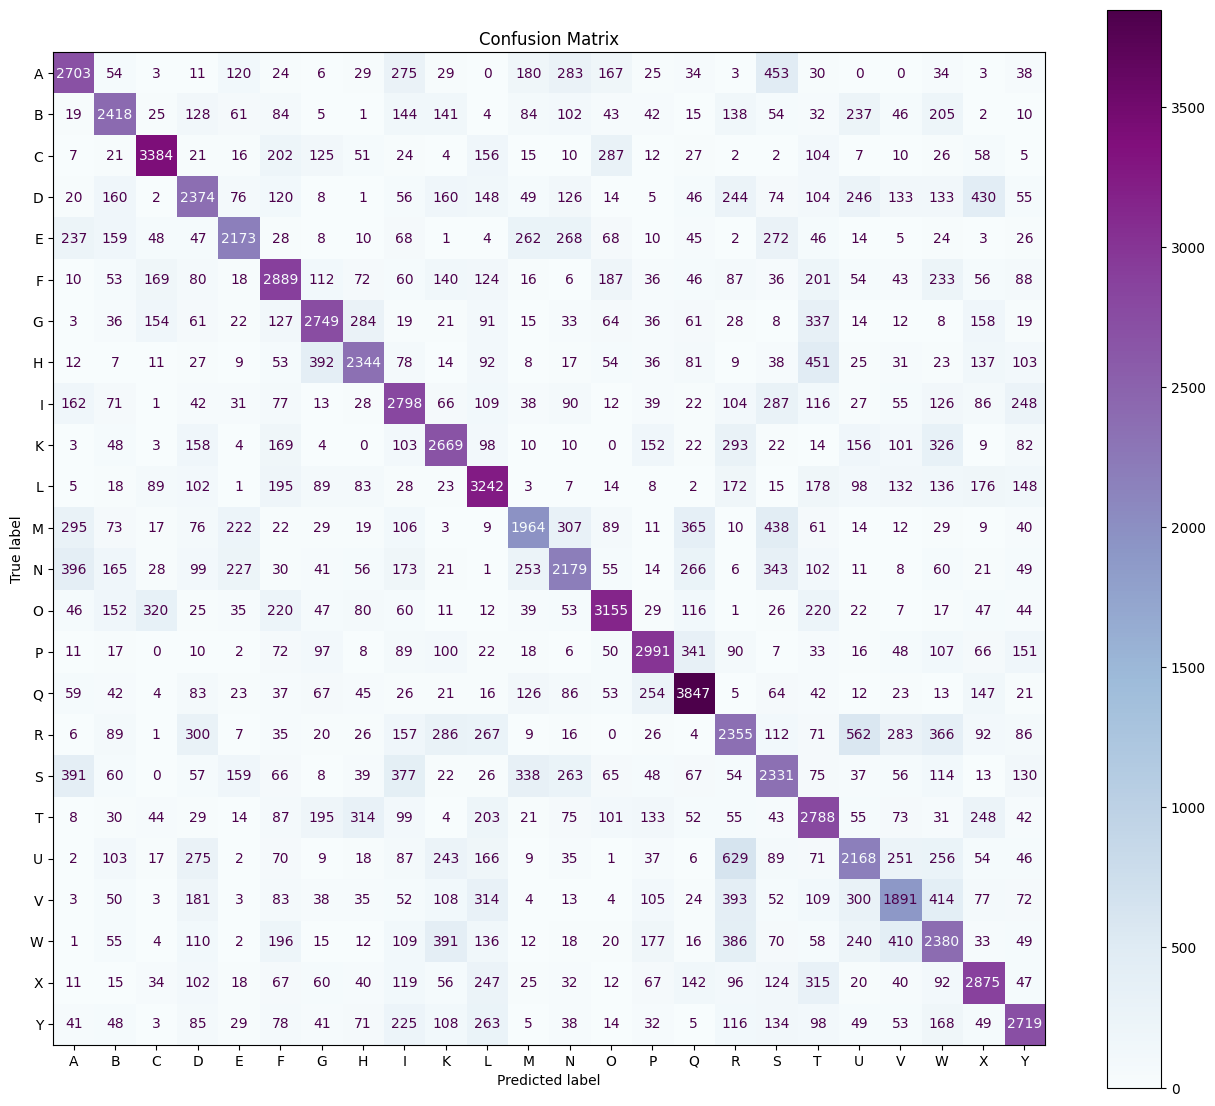

In [ ]:
evaluate_model(y_train, y_pred_lr_train, letters)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


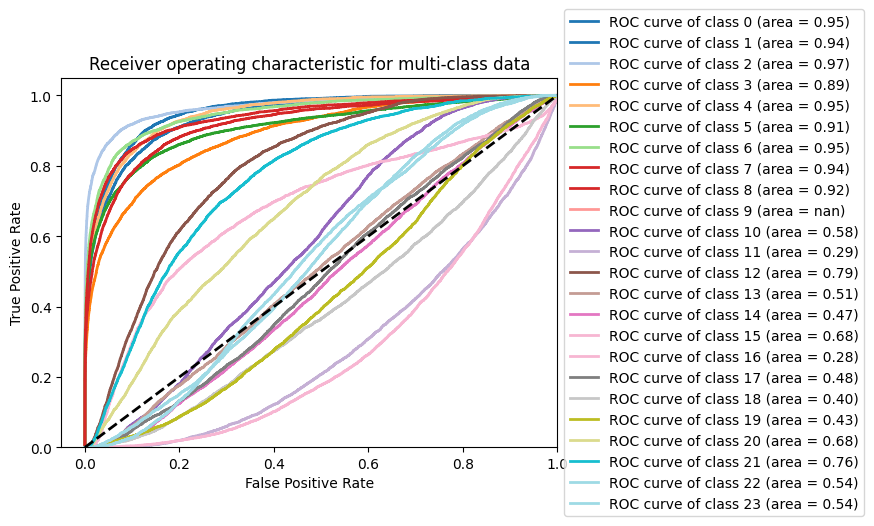

In [ ]:
from matplotlib import cm

n_classes = len(np.unique(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train == i, classifiers.predict_proba(X_train_lda)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cm.tab20(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
# testing logistic regression on test data
y_pred_lr_test = lr.fit(X_train_lda, y_train).predict(X_test_lda)

Accuracy: 0.42498605688789737
Classification report:
              precision    recall  f1-score   support

           A       0.44      0.53      0.48      1324
           B       0.63      0.49      0.55      1728
           C       0.68      0.60      0.64      1240
           D       0.36      0.47      0.41       980
           E       0.61      0.44      0.51      1992
           F       0.41      0.48      0.44       988
           G       0.54      0.48      0.51      1392
           H       0.76      0.48      0.59      1744
           I       0.33      0.37      0.35      1152
           K       0.41      0.39      0.40      1324
           L       0.48      0.73      0.58       836
           M       0.42      0.26      0.32      1576
           N       0.26      0.27      0.26      1164
           O       0.47      0.42      0.45       984
           P       0.72      0.63      0.67      1388
           Q       0.35      0.61      0.45       656
           R       0.08     

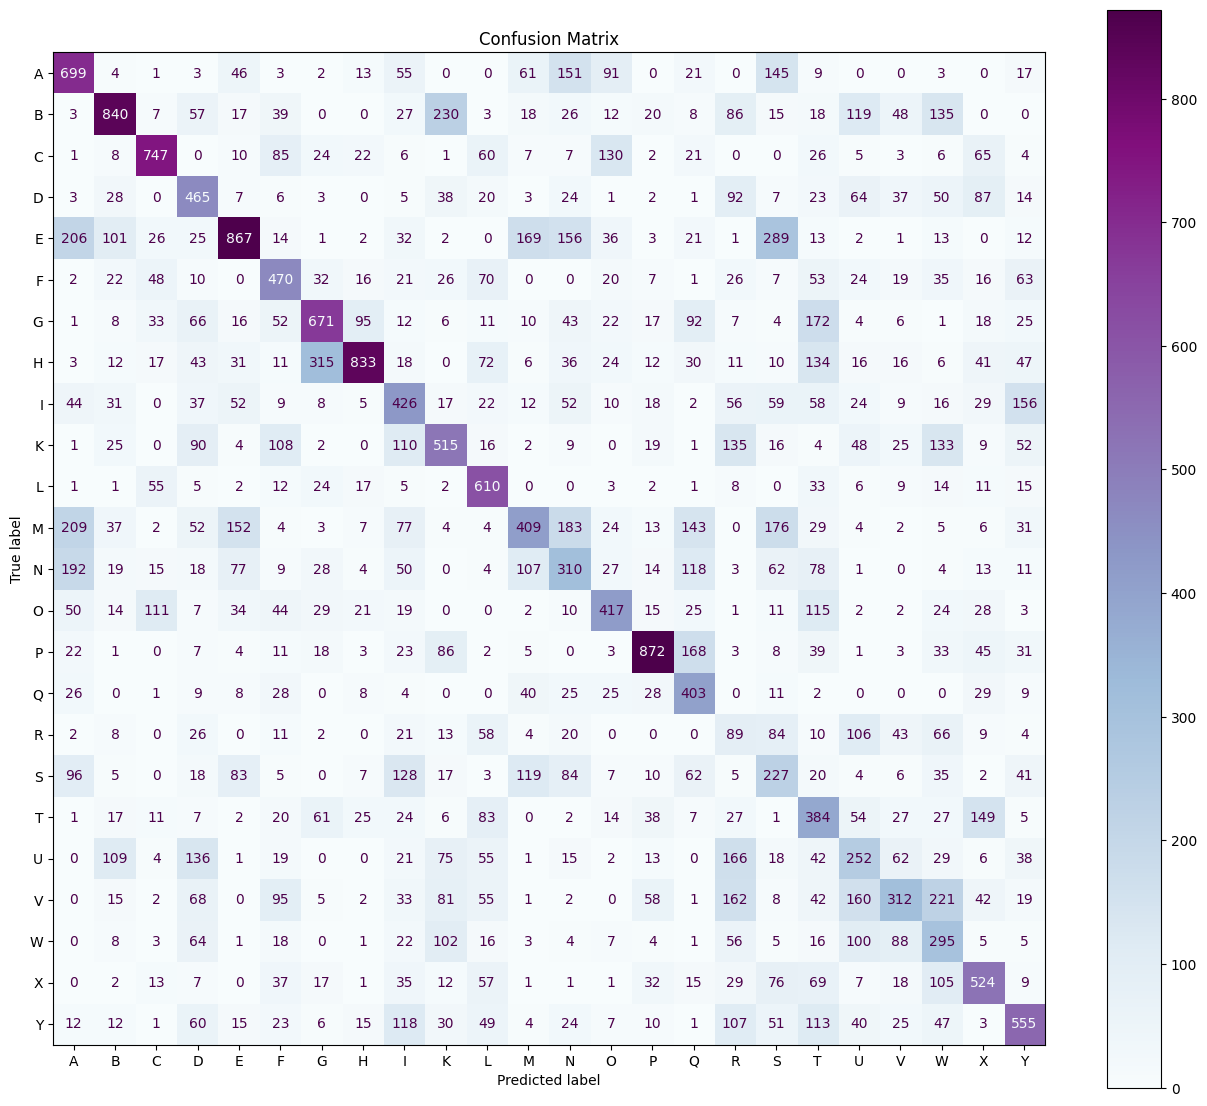

In [ ]:
evaluate_model(y_test, y_pred_lr_test, letters)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


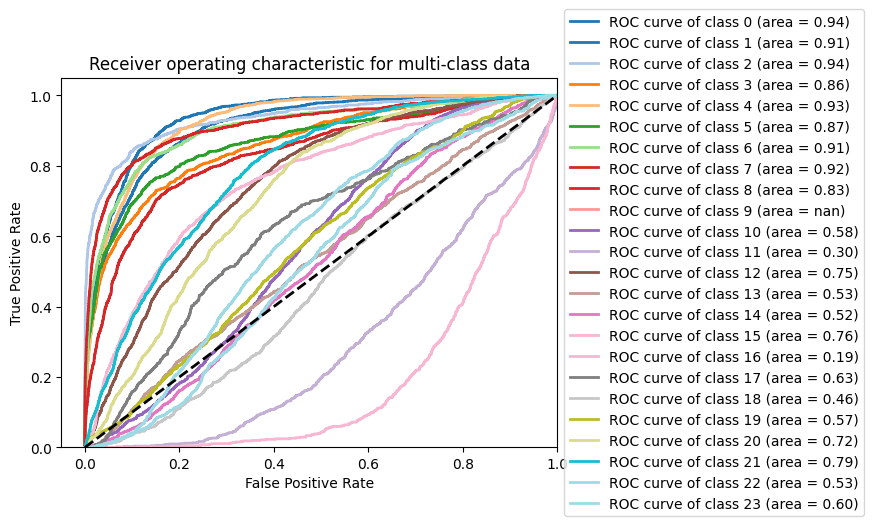

In [ ]:
from matplotlib import cm

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, classifiers.predict_proba(X_test_lda)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cm.tab20(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### Loading Combined feature data


In [8]:
# Load the augmented data from the file
data = np.load('/content/drive/Shareddrives/SignLanguageData/combined_features_pca_lda.npz')
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

In [9]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 53)
y_train Shape: (109820,)
X_test Shape: (28688, 53)
y_test Shape: (28688,)


### Naive bayes


Accuracy: 0.6909032963030414
Classification report:
              precision    recall  f1-score   support

           A       0.73      0.69      0.71      4504
           B       0.79      0.71      0.75      4040
           C       0.90      0.77      0.83      4576
           D       0.65      0.57      0.61      4784
           E       0.74      0.64      0.69      3828
           F       0.81      0.74      0.77      4816
           G       0.81      0.74      0.77      4360
           H       0.73      0.69      0.71      4052
           I       0.65      0.74      0.69      4648
           K       0.68      0.60      0.64      4456
           L       0.79      0.75      0.77      4964
           M       0.67      0.58      0.62      4220
           N       0.63      0.54      0.58      4604
           O       0.81      0.80      0.80      4784
           P       0.88      0.86      0.87      4352
           Q       0.83      0.87      0.85      5116
           R       0.45      

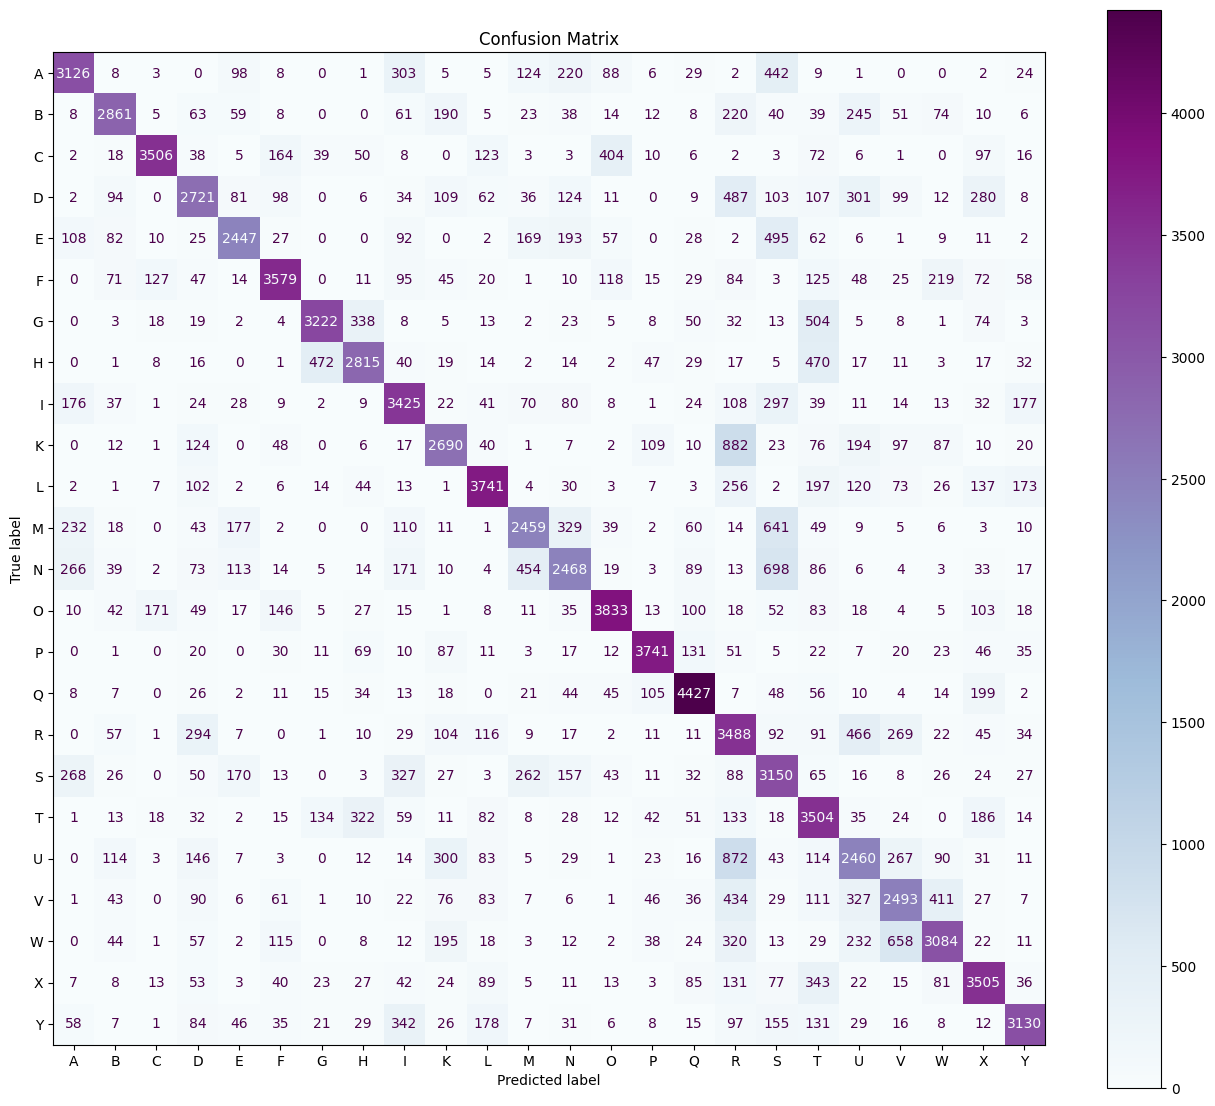

In [13]:
gnb = GaussianNB()

# applying NB on normalized train data
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)

evaluate_model(y_train, y_pred_train, letters)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


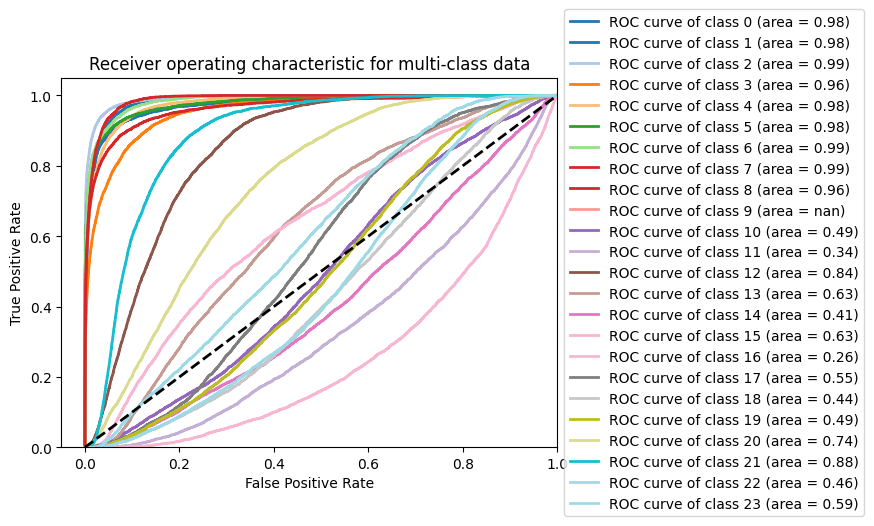

In [ ]:
plot_roc_curve(gnb, X_train, y_train)


Accuracy: 0.5659509202453987
Classification report:
              precision    recall  f1-score   support

           A       0.67      0.67      0.67      1324
           B       0.75      0.49      0.60      1728
           C       0.88      0.61      0.72      1240
           D       0.43      0.52      0.47       980
           E       0.75      0.58      0.65      1992
           F       0.68      0.64      0.66       988
           G       0.72      0.65      0.68      1392
           H       0.82      0.68      0.75      1744
           I       0.53      0.56      0.54      1152
           K       0.48      0.44      0.46      1324
           L       0.73      0.82      0.77       836
           M       0.53      0.41      0.46      1576
           N       0.41      0.40      0.41      1164
           O       0.66      0.69      0.67       984
           P       0.91      0.85      0.88      1388
           Q       0.64      0.80      0.71       656
           R       0.15      

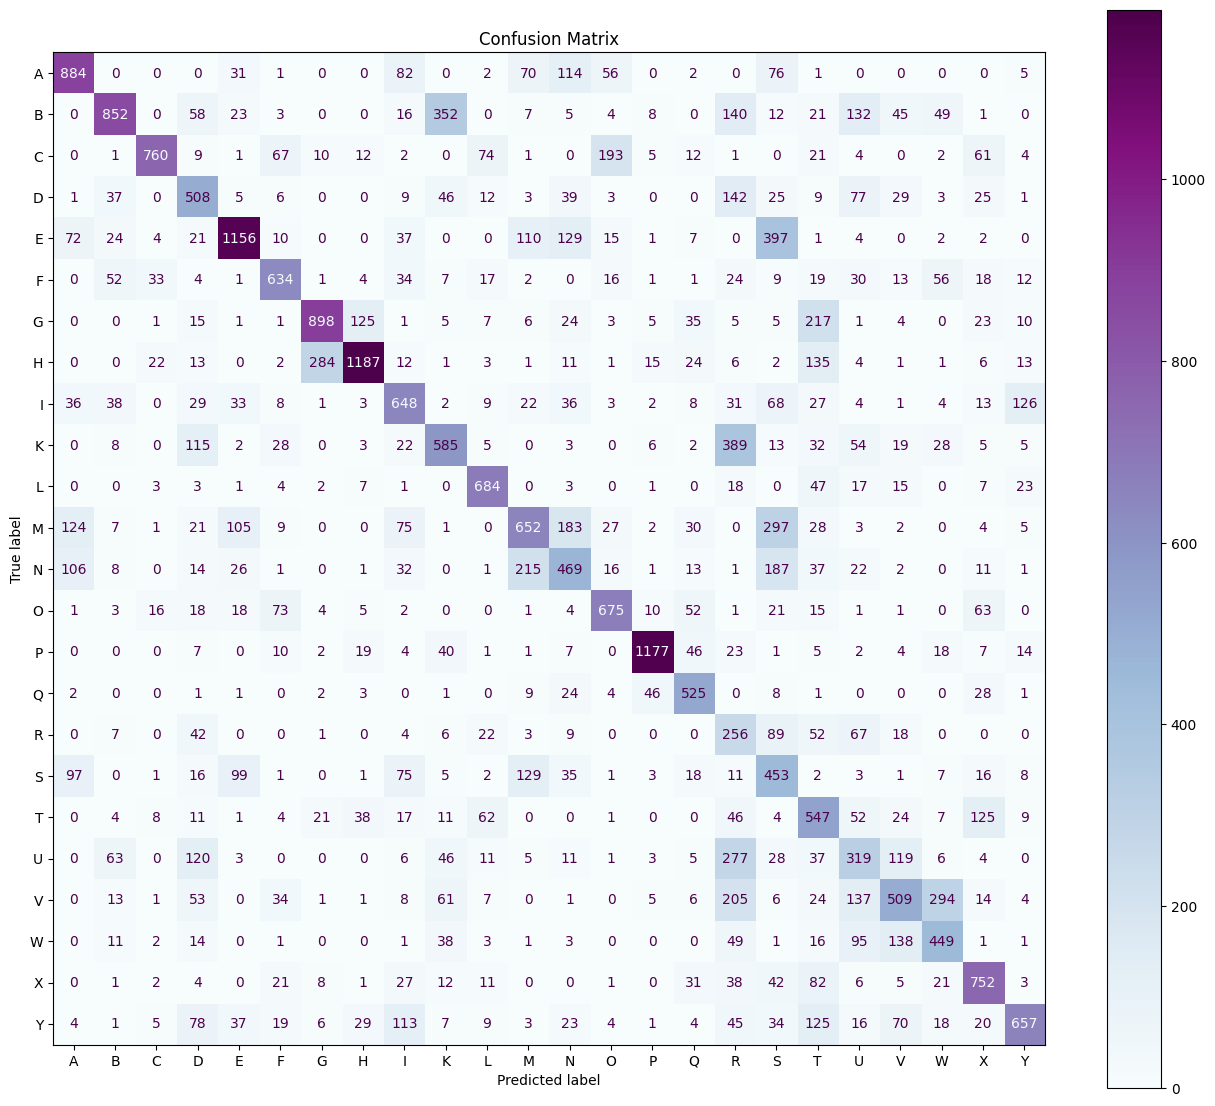

In [14]:

# applying NB on normalized test data
y_pred_test = gnb.fit(X_train, y_train).predict(X_test)

evaluate_model(y_test, y_pred_test, letters)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


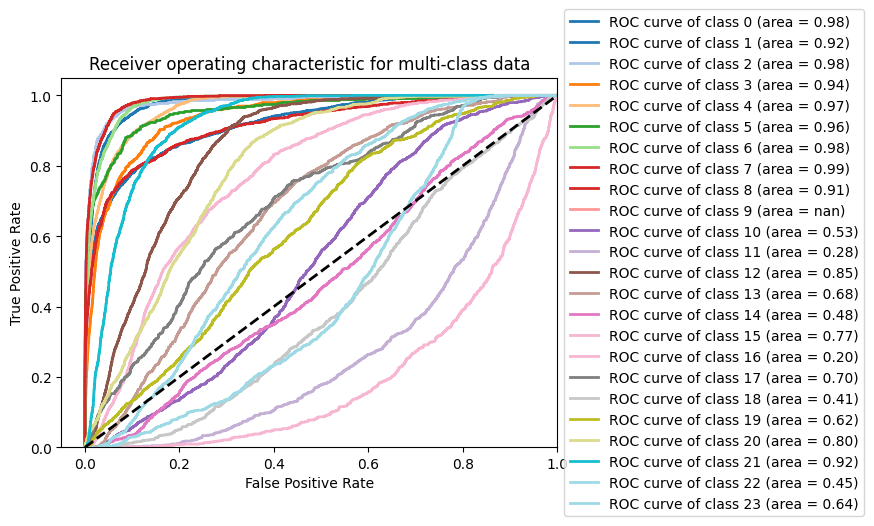

In [ ]:
plot_roc_curve(gnb, X_test, y_test)


### Logistic Regression

In [ ]:
lr = LogisticRegression(C=3.4647045830997407,
                        max_iter=3171, 
                        penalty="l2", 
                        solver="liblinear",
                        warm_start=False)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=3.4647045830997407, max_iter=3171, solver='liblinear')

In [ ]:
# applying Logistic regression and predicting on train
y_pred_lr_train = lr.predict(X_train)

In [ ]:
# testing logistic regression on test data
y_pred_lr_test = lr.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_lr_test)}")
print(f" Train Accuracy: {accuracy_score(y_train, y_pred_lr_train)}")

Test Accuracy: 0.6203639152258784
 Train Accuracy: 0.7423602258240758


In [ ]:
train_acc = []
test_acc = []

#function for sampling
def sampler(X,y,num_sample):
  indices = np.random.choice(X.shape[0], num_sample, replace=False)
  return X[indices,:],y[indices]

# Sample the data
X_train_sample, y_train_sample = sampler(X_train, y_train, num_sample=50000)
X_test_sample, y_test_sample = sampler(X_test, y_test, num_sample=15000)

for C in [0.01, 0.1, 1, 3, 5, 7, 9, 10]:
  print(f"C={C}")
  lr = LogisticRegression(C=C,
                        max_iter=3171, 
                        penalty="l2", 
                        solver="liblinear",
                        warm_start=False)
  lr.fit(X_train_sample, y_train_sample)
  y_pred_lr_train = lr.predict(X_train_sample)
  y_pred_lr_test = lr.predict(X_test_sample)
  train_acc.append(accuracy_score(y_train_sample, y_pred_lr_train))
  test_acc.append(accuracy_score(y_test_sample, y_pred_lr_test))


C=0.01
C=0.1
C=1
C=3
C=5
C=7
C=9
C=10


In [ ]:
print(train_acc)
print(test_acc)

[0.72862, 0.74196, 0.74518, 0.74538, 0.74526, 0.74522, 0.74522, 0.74522]
[0.601, 0.6196, 0.6218666666666667, 0.622, 0.6219333333333333, 0.622, 0.622, 0.622]


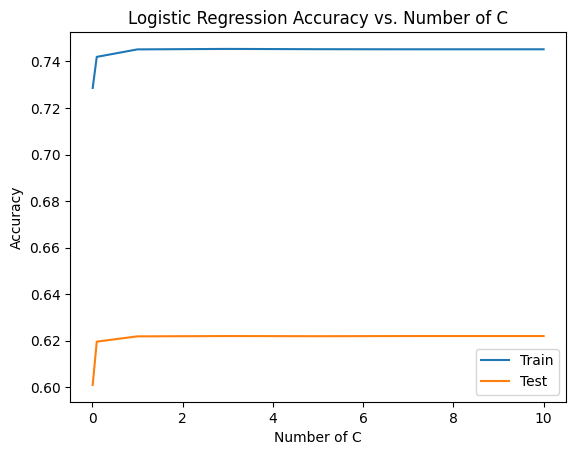

In [ ]:
plt.plot([0.01, 0.1, 1, 3, 5, 7, 9, 10],train_acc,label='Train')
plt.plot([0.01, 0.1, 1, 3, 5, 7, 9, 10],test_acc,label='Test')
plt.title('Logistic Regression Accuracy vs. Number of C')
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
train_acc = []
test_acc = []

#function for sampling
def sampler(X,y,num_sample):
  indices = np.random.choice(X.shape[0], num_sample, replace=False)
  return X[indices,:],y[indices]

# Sample the data
X_train_sample, y_train_sample = sampler(X_train, y_train, num_sample=50000)
X_test_sample, y_test_sample = sampler(X_test, y_test, num_sample=15000)

for C in np.linspace(0.01,1,10):
  print(f"C={C}")
  lr = LogisticRegression(C=C,
                        max_iter=3171, 
                        penalty="l2", 
                        solver="liblinear",
                        warm_start=False)
  lr.fit(X_train_sample, y_train_sample)
  y_pred_lr_train = lr.predict(X_train_sample)
  y_pred_lr_test = lr.predict(X_test_sample)
  train_acc.append(accuracy_score(y_train_sample, y_pred_lr_train))
  test_acc.append(accuracy_score(y_test_sample, y_pred_lr_test))


C=0.01
C=0.12
C=0.23
C=0.34
C=0.45
C=0.56
C=0.67
C=0.78
C=0.89
C=1.0


In [ ]:
print(train_acc)
print(test_acc)

[0.72756, 0.74172, 0.74322, 0.74354, 0.74364, 0.74382, 0.74382, 0.74384, 0.74382, 0.74388]
[0.5993333333333334, 0.6134, 0.6144, 0.6148, 0.6151333333333333, 0.6152, 0.6155333333333334, 0.6156666666666667, 0.6154, 0.6154666666666667]


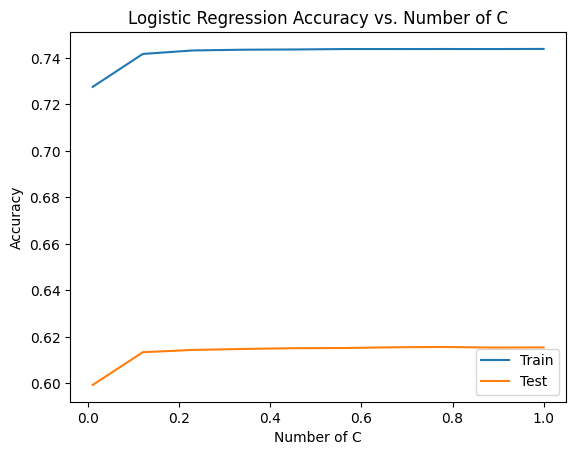

In [ ]:
plt.plot((np.linspace(0.01,1,10)),train_acc,label='Train')
plt.plot(np.linspace(0.01,1,10),test_acc,label='Test')
plt.title('Logistic Regression Accuracy vs. Number of C')
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
from scipy.stats import uniform
lr = LogisticRegression()

max_iter = range(5000)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = uniform(loc=0, scale=4)
penalty = ["l1", "l2"]
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
    'penalty' : penalty,
}

In [ ]:
lr_search = RandomizedSearchCV(estimator = lr,
                                   param_distributions = random_grid,
                                   scoring = 'accuracy',
                                   verbose = 3, 
                                   random_state = 42,
                                  )

In [ ]:
lr_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.741 total time= 1.1min
[CV 2/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.737 total time=  56.9s
[CV 3/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.741 total time=  57.5s
[CV 4/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.740 total time=  57.2s
[CV 5/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.740 total time=  56.2s
[CV 1/5] END C=2.3946339367881464, max_iter=466, penalty=l1, solver=liblinear, warm_start=True;, score=0.740 total time=  56.6s
[CV 2/5] END C=2.3946339367881464, max_iter=466, penalty=l1, solver=liblinear, warm_start=True;, score=0.737 total time=  56.9s
[CV 3/5] END C=2.3946339367881464, max_iter=466,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8f717beaa0>,
                                        'max_iter': range(0, 5000),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
#dumping randomized search cv into pickle file 
with open('/content/drive/Shareddrives/SignLanguageData/lr_search.pkl','wb') as f:
  pickle.dump(lr_search, f)

In [ ]:
print('Best hyperparameters:', lr_search.best_params_)
print('Best score:', lr_search.best_score_)

Best hyperparameters: {'C': 0.22564631610840102, 'max_iter': 2391, 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': False}
Best score: 0.7677745401566198


In [15]:
lr = LogisticRegression(C=0.22564631610840102,
                        max_iter=2391, 
                        penalty="l2", 
                        solver='newton-cg',
                        warm_start=False)

In [16]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.22564631610840102, max_iter=2391, solver='newton-cg')

In [17]:
# applying Logistic regression and predicting on train
y_pred_lr_train = lr.predict(X_train)
# testing logistic regression on test data
y_pred_lr_test = lr.predict(X_test)


Accuracy: 0.7713349116736478
Classification report:
              precision    recall  f1-score   support

           A       0.76      0.80      0.78      4504
           B       0.82      0.81      0.82      4040
           C       0.89      0.88      0.88      4576
           D       0.72      0.70      0.71      4784
           E       0.78      0.71      0.74      3828
           F       0.80      0.79      0.79      4816
           G       0.82      0.81      0.82      4360
           H       0.80      0.81      0.80      4052
           I       0.74      0.74      0.74      4648
           K       0.75      0.76      0.75      4456
           L       0.84      0.87      0.85      4964
           M       0.70      0.63      0.66      4220
           N       0.68      0.68      0.68      4604
           O       0.84      0.83      0.83      4784
           P       0.88      0.89      0.88      4352
           Q       0.89      0.90      0.89      5116
           R       0.66      

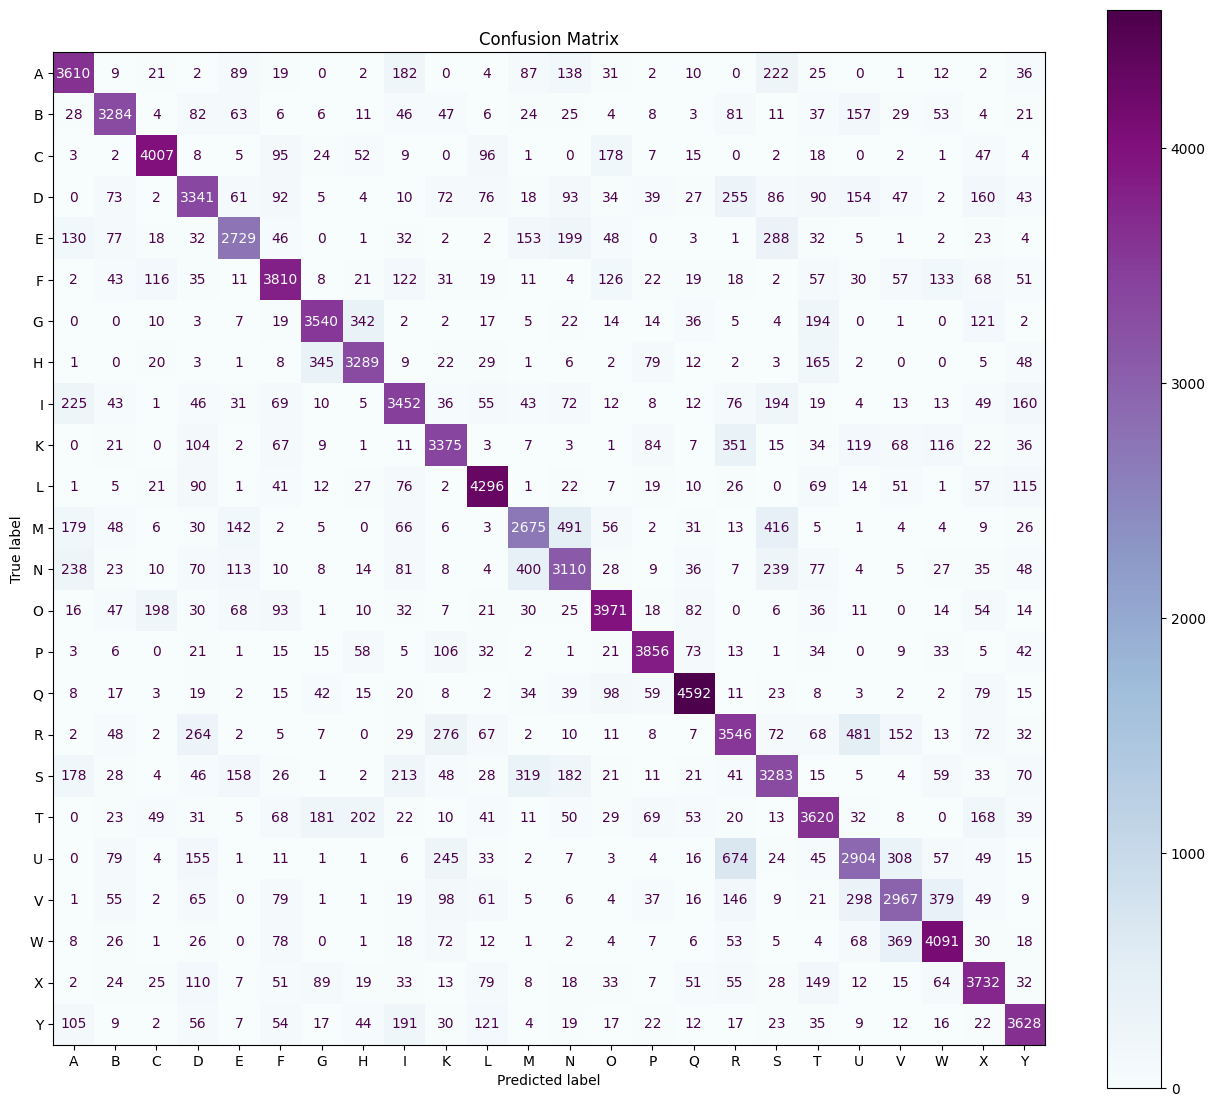

In [18]:
evaluate_model(y_train, y_pred_lr_train, letters)


Accuracy: 0.6512479085331846
Classification report:
              precision    recall  f1-score   support

           A       0.74      0.82      0.78      1324
           B       0.77      0.62      0.69      1728
           C       0.88      0.76      0.81      1240
           D       0.57      0.64      0.61       980
           E       0.76      0.65      0.70      1992
           F       0.69      0.71      0.70       988
           G       0.73      0.71      0.72      1392
           H       0.84      0.73      0.78      1744
           I       0.60      0.57      0.59      1152
           K       0.58      0.59      0.59      1324
           L       0.73      0.89      0.80       836
           M       0.59      0.46      0.51      1576
           N       0.46      0.46      0.46      1164
           O       0.72      0.70      0.71       984
           P       0.89      0.87      0.88      1388
           Q       0.72      0.86      0.78       656
           R       0.29      

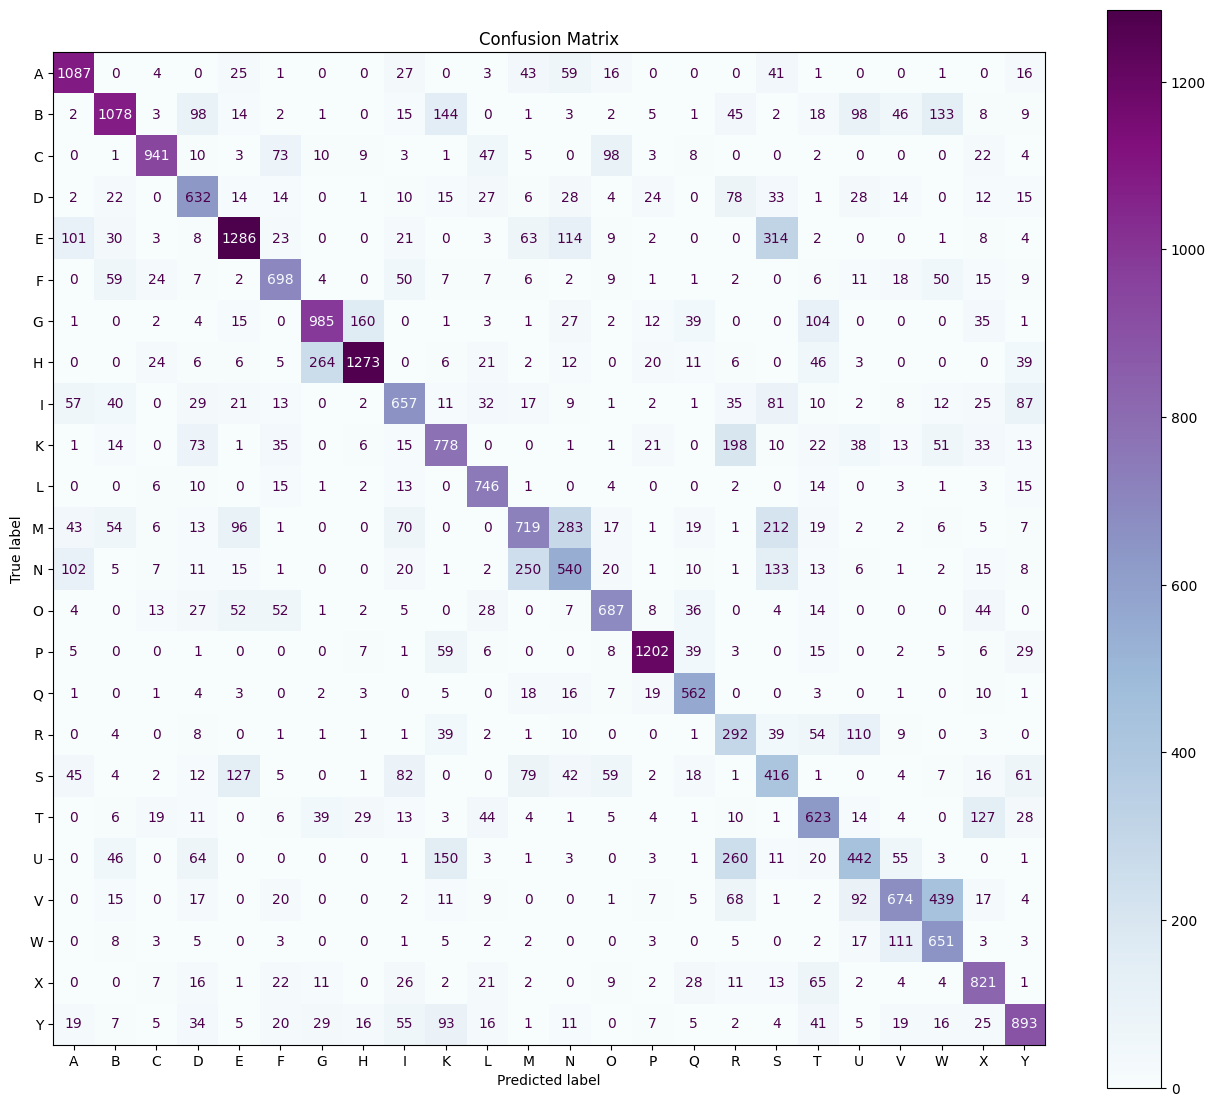

In [19]:
evaluate_model(y_test, y_pred_lr_test, letters)
# plot_roc_curve(lr, X_test, y_test)

In [ ]:
import pickle

# Define the path where you want to save your pickled model
path = "/content/drive/Shareddrives/SignLanguageData/lr_model.pkl"

# Pickle the model and save it to the specified path
with open(path, "wb") as file:
    pickle.dump(lr, file)


In [ ]:
train_acc = []
test_acc = []

#function for sampling
def sampler(X,y,num_sample):
  indices = np.random.choice(X.shape[0], num_sample, replace=False)
  return X[indices,:],y[indices]

# Sample the data
X_train_sample, y_train_sample = sampler(X_train, y_train, num_sample=50000)
X_test_sample, y_test_sample = sampler(X_test, y_test, num_sample=15000)

for C in np.linspace(0.01,5,10):
  print(f"C={C}")
  lr = LogisticRegression(C=C,
                        max_iter=3171, 
                        penalty="l2", 
                        solver="liblinear",
                        warm_start=False)
  lr.fit(X_train_sample, y_train_sample)
  y_pred_lr_train = lr.predict(X_train_sample)
  y_pred_lr_test = lr.predict(X_test_sample)
  train_acc.append(accuracy_score(y_train_sample, y_pred_lr_train))
  test_acc.append(accuracy_score(y_test_sample, y_pred_lr_test))

C=0.01
C=0.5644444444444445
C=1.118888888888889
C=1.6733333333333336
C=2.227777777777778
C=2.7822222222222224
C=3.336666666666667
C=3.8911111111111114
C=4.445555555555556
C=5.0


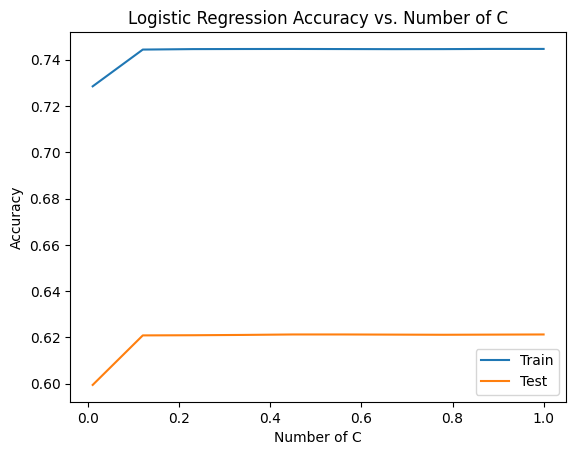

In [ ]:
plt.plot((np.linspace(0.01,1,5)),train_acc,label='Train')
plt.plot(np.linspace(0.01,1,5),test_acc,label='Test')
plt.title('Logistic Regression Accuracy vs. Number of C')
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.legend()